In [73]:
import numpy as np
import random
from fractions import Fraction
from Commands import dec2int, bernoulli, control, order_parameter
from MonteCarloCommands import energy, boltzmann_probability
import matplotlib.pyplot as plt




In [74]:

length = 100
random.seed(10)
times = 5
low_prob = 00
high_prob = 100 + 1
Beta =10000000
K = -1 
num_chains = 2
spacing = 10
num_points = int(np.ceil((high_prob-low_prob)/spacing))




In [75]:
if (length**2) % 10 == 0:
#record = np.zeros([high_prob-low_prob, 1], dtype=float)
    time_size = (length**2)//100+1 # number of data points along the time axis

    #record1 = np.zeros([num_points, time_size], dtype=float) #[probability, time]
    #record2 = np.zeros([num_points, time_size], dtype=float)
    recordferro = np.zeros([num_points,time_size], dtype=float) # set up for ferromagnetic order parameter
    #record3 = np.zeros([high_prob-low_prob, 1], dtype=float)
    #recordlong = np.zeros((num_points, length, time_size), dtype=float) #[probability, position, time]
    staggeredMagnetization = np.zeros((num_points,time_size), dtype=float)
    #totalparam = np.zeros((num_points,time_size))
    #totrecordlong = np.zeros((num_points, time_size))
    
else: 
    time_size = (length**2)//100+2 # number of data points along the time axis

    #record1 = np.zeros([num_points, time_size], dtype=float) #[probability, time]
    #record2 = np.zeros([num_points, time_size], dtype=float)
    recordferro = np.zeros([num_points,time_size], dtype=float) # set up for ferromagnetic order parameter
    #record3 = np.zeros([high_prob-low_prob, 1], dtype=float)
    #recordlong = np.zeros((num_points, length, time_size), dtype=float)
    staggeredMagnetization = np.zeros((num_points,time_size), dtype=float)
    #totalparam = np.zeros((num_points,time_size))
    #totrecordlong = np.zeros((num_points, time_size))


In [76]:
rep1 = random.getrandbits(length)
rep2 = random.getrandbits(length)
print(bin(rep1),bin(rep2))
lattice = [format(rep1, '0'+str(length)+'b'), format(rep2, '0'+str(length)+'b')]
                       #format(rep3, '0'+str(length)+'b')]
recordferro[0, 0] += np.abs((lattice[0].count('1')+lattice[1].count('1')-lattice[0].count('0')-lattice[1].count('0'))/(2*length))
for y in range(length):
    for x in range(num_chains):
        staggeredMagnetization[0, 0] += np.abs((-1)**(x+y+~int(lattice[x][y]))/(2*length))
for i in range((length**2)):
    for y_pos in range(0, length): # this section takes about 1/100 s at length = 100, accounts for most of the run time
        for x_pos in range(0, num_chains):
            E_i = energy(x_pos, y_pos, lattice, num_chains, length, K, num_chains==2)
            old = lattice[x_pos]
            # noinspection PyTypeChecker
            lattice[x_pos] = format(int(lattice[x_pos], base=2) ^ (1 << (length - y_pos - 1)), '0' + str(length) + 'b')
            E_f = energy(x_pos, y_pos, lattice, num_chains, length, K, num_chains==2)
            if random.random() <= boltzmann_probability(E_i, E_f, Beta):
                pass
            else:
                lattice[x_pos] = old
    if (i%100)==0 and i !=0 and i != (length**2)//2:
        recordferro[0, i//100] += np.abs((lattice[0].count('1')+lattice[1].count('1')-lattice[0].count('0')-lattice[1].count('0'))/(2*length))

        for y in range(length):
            for x in range(num_chains):
                staggeredMagnetization[0, i//100] += np.abs((-1)**(x+y+~int(lattice[x][y]))/(2*length))
print(lattice[0],lattice[1])

0b111011011011100101110101100010100000000100001010111011111101011000110010010010001110111000011010011 0b111001101001100001011011010100000000000001111001100000011110010011110010011111111011100101010111000
1111111111111100000111111100000000000000000011111110000011110000001110000000111111111111000000111111 1111111111111100000111111100000000000000000011111110000011110000001110000000111111111111000000111111


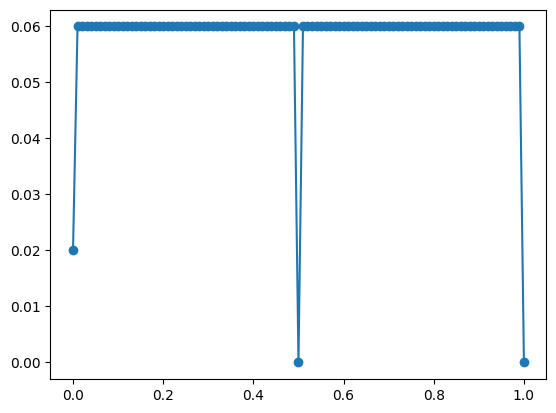

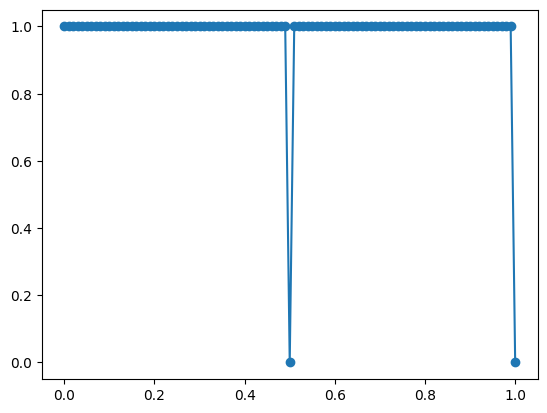

In [77]:
fig, ax = plt.subplots()
ax.plot( np.linspace(0,1,time_size), np.abs(recordferro[0,:]), marker='o', label= "Magnetization")
plt.show()
fig, ax = plt.subplots()
ax.plot( np.linspace(0,1,time_size), staggeredMagnetization[0,:], marker='o', label= "Staggered Magnetization")
plt.show()
#plt.imshow(lattice, cmap='hot',interpolation='nearest')